# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Prediction of Insurance Price of an individual </span> </div>

### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Predict the insurance price of an individual from the given data  </span> </div>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Important: </b></p>
<p style='margin-left:1em;'>
- The tasks are given to guide the flow, Few tasks can also be considered optional if there is no scope or need.<br>
- It is always encouraged to add your options to the list or flow as additional performance is always appreciated. <br>
- Not only the results but also Visualization, Inferences, Reasons, Probabilities & Implementations are equally important. <br>
- Please make sure the conclusions for the plots, results and summaries are mentioned in your own way. Add a natural comprehension to it thinking from a real time perspective. <br>
- Its always encouraged to make this process a way of conveying a story as engaging as possible. <br>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Flow of Guided Project: </b></p>
<p style='margin-left:1em;'>
- There are certain tasks given here in order to understand and extract insights from the data. <br>
- Carefully, Go through each step and provide proper reasons and explanations for the assumptions and actions.  
</p>
</span>
</div>

## Table of Contents
* [Import necessary libraries](#Import_necessary_libraries)
* [Data loading](#Data_loading)
* [Lets Start!!](#start)
* [Data preprocessing](#Data_preprocessing)
* [Exploratory Data Analysis, Statistical Inferences and Feature Engineering](#Statistical_Inferences)
* [Assumptions](#Assumptions)
* [Evaluation metrics](#Evaluation_metrics)
* [Hyperparameter Tuning](#Hyperparameter_Tuning)
* [Build a predictive system](#Build)

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> WEEK-I </p> </span> </div>

<div class="warning" style='padding:0.1em;  background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Interpretation of data: </b></p>
<p style='margin-left:1em;'>
    
* age: age of primary beneficiary <br>

* sex: insurance contractor gender, female, male <br>

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9 <br>

* children: Number of children covered by health insurance / Number of dependents <br>

* smoker: Smoking <br>

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. <br>

* charges: Individual medical costs billed by health insurance <br>
</p>
</span>
</div>

Download the dataset from here: <br>
Click here: <br>
<a href='https://drive.google.com/file/d/1SaRrBmZwxqUjpXHzCfYWo7L8ZQUpc7MX/view?usp=sharing' title='Google Drive'> Insurance data

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

##  <mark><span  style= "font-family: Times New Roman">Data Loading</span> </mark> <a class="anchor" id="Data_loading"></a>

In [89]:
df = pd.read_csv('C:\Data Science\insurance.csv')

In [90]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##  <mark><span  style= "font-family: Times New Roman">Lets Start!!</span> </mark> <a class="anchor" id="start"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
- Using info(), Check the no of non-null values? <br>
- Also check if the data is in the convenient type. If not, change it to your convenience. <br>
- You may encode the data here itself, if you wish to!
</p>
</span>
</div>

In [91]:
# Display the summary of the DataFrame before changing
df.info()

# Convert 'sex', 'smoker', and 'region' columns to string type
df['sex'] = df['sex'].astype(str)
df['smoker'] = df['smoker'].astype(str)
df['region'] = df['region'].astype(str)

# Display the data types after conversion
print("\n****** Dtypes after conversion to string ******")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

****** Dtypes after conversion to string ******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges 

##  <mark><span  style= "font-family: Times New Roman">Data preprocessing </span> </mark> <a class="anchor" id="Data_preprocessing"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- If there are any missing values encountered above: <br>
     Impute or remove the null data and provide the reason for that <br>
- Else: <br>
     Lets move ahead!!
</pre>
</p>
</span>
</div>

In [92]:
# Check if any missing values exist
missing_values = df.isnull().sum()
if missing_values.any():
    '''# if there is a missing value I am gonna Impute the value because after removing 
         the entire row it will affect the analysis and visualization'''
    numerical_columns = df.select_dtypes(include=['number']).columns
    for col in numerical_columns:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
    
    print("Missing values imputed because after removing the entire row it will affect the analysis and visualization")
else:
    print("No missing values encountered. Let's move ahead!")

No missing values encountered. Let's move ahead!


##  <mark><span  style= "font-family: Times New Roman">Exploratory Data Analysis, Statistical Inferences and Feature Engineering </span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'age' first:
</pre>
</p>
</span>
</div>

In [48]:
colors = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Create a new feature named 'age group' and categorize them as following: 

    - <10 : 'Less than 10' (10 is included)
    - between 10 and 20 (10 is not included, 20 is included) : '10-20'
    - between 20 and 30 : '20-30'
    - between 30 and 40 : '30-40'
    - between 40 and 50 : '40-50'
    - between 50 and 60 : '50-60'
    - from 60 upto max (not including 60) : '>60'
    
    Use pandas.cut() for converting into bins
</pre>
</p>
</span>
</div>

In [93]:
# Define the bins for age groups
bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]  # Define the age bins

# Define the labels for age groups
labels = ['Less than 10', '10-20', '20-30', '30-40', '40-50', '50-60', '>60']

# Create the 'age group' feature based on the 'age' column
df['age group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df.head())

   age     sex     bmi  children smoker     region      charges age group
0   19  female  27.900         0    yes  southwest  16884.92400     10-20
1   18    male  33.770         1     no  southeast   1725.55230     10-20
2   28    male  33.000         3     no  southeast   4449.46200     20-30
3   33    male  22.705         0     no  northwest  21984.47061     30-40
4   32    male  28.880         0     no  northwest   3866.85520     30-40


### Using describe(), Answer the following questions: <br>

In [50]:
summary = df.describe()
print(summary)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - Given for 75%, age is 51, what does that mean? 
</pre>
</p>
</span>
</div>

In [51]:
print("it indicates that 75% of the individuals in the dataset are aged 51 or younger !!!")

it indicates that 75% of the individuals in the dataset are aged 51 or younger !!!


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - How many people are aged above or equal to 75%?
</pre>
</p>
</span>
</div>

In [94]:
# Given data
age_75th_percentile = 51  # Age corresponding to the 75%
total_count = 1338  # Total count of people

# Calculate the count of people aged above or equal to the 75%
count_above_75th_percentile = df[df['age'] >= age_75th_percentile].shape[0]

print("Count of people aged above or equal to 75%:", count_above_75th_percentile)


Count of people aged above or equal to 75%: 356


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - What count and percentile of people are aged above 45?

Note: Round your answer upto 2 digits
</pre>
</p>
</span>
</div>

In [95]:
total_count = 1338  # Total count of people
count_above_45 = total_count - summary.loc['50%', 'age']  # Count of people aged above 45

# Calculate the percentage of people aged above 45
percentage_above_45 = (count_above_45 / total_count) * 100

# Round the percentage to 2 decimal places
percentage_above_45 = round(percentage_above_45, 2)

print("Count of people aged above 45:", count_above_45)
print("Percentage of people aged above 45:", percentage_above_45, "%")


Count of people aged above 45: 1299.0
Percentage of people aged above 45: 97.09 %


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - Which group of people has highest amount of smokers?
</pre>
</p>
</span>
</div>

In [54]:
# Group the data by 'age group' and count the number of smokers in each group
smoker_counts = df.groupby('age group')['smoker'].value_counts().unstack().fillna(0)

# Find the group with the highest count of smokers
highest_smoker_group = smoker_counts['yes'].idxmax()

print("Group with the highest count of smokers:", highest_smoker_group)

Group with the highest count of smokers: 40-50


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Sample plot: </b></p>
<p style='margin-left:1em;'>
<pre> - Using sns.countplot() and plt.pie(), plot a count plot and pie plot for age group.
</pre>
</p>
</span>
</div>

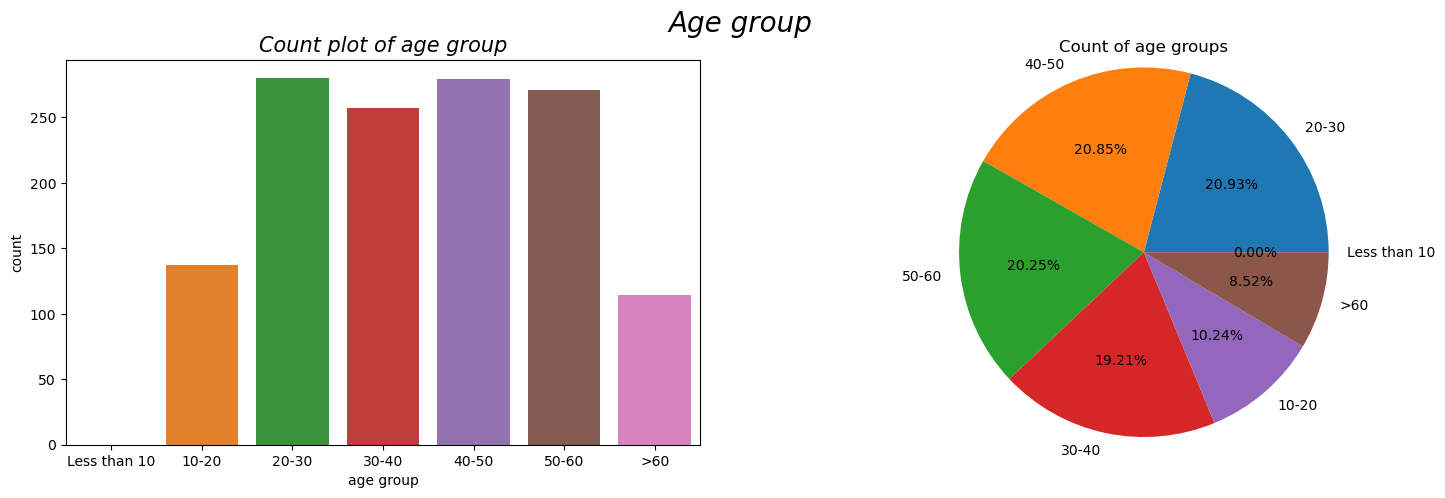

In [96]:
column = 'age group'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Age group',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> 
- Observe the above plot and format given, Now..
- Define a function giving input as column name such as def plot_data(column_name):
- In that, 
- Using sns.histplot(), sns.distplot(), sns.boxplot() plot the histogram plot, distribution plot and box plot for the age feature

### Use the below code for histogram and distribution plot.
Hint: 
sns.histplot(ax=axes[0],x=column,data=df,color=colors[1])
axes[0].set_title('Histogram of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

sns.distplot(ax=axes[1],x=df[column],axlabel=column,color=colors)
axes[1].set_title('Distribution of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
plt.text(.95,.95,'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(df[column].std(),
        df[column].var(),df[column].skew(),df[column].kurtosis()),ha='right', va='top', transform=axes[1].transAxes)

Try to write the code for box plot as third subplot as shown above.

Image is given below!!
</pre>
</p>
</span>
</div>

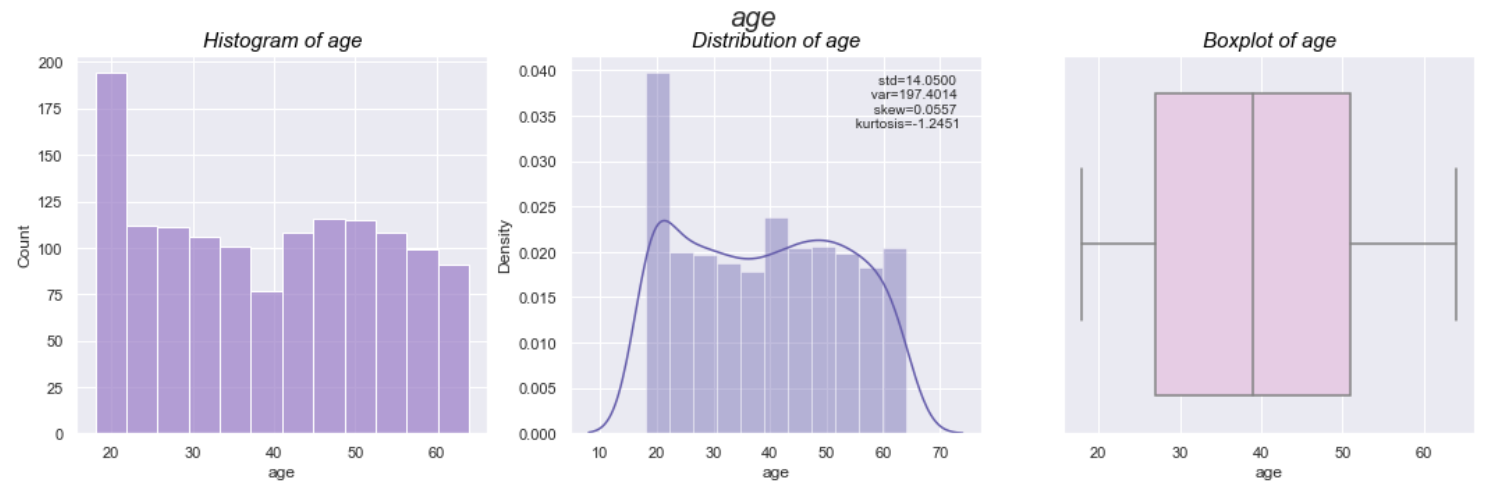

In [97]:
# function start
def plot_data(column_name):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(column_name, fontsize=20, fontstyle='oblique')

    # Histogram plot
    sns.histplot(ax=axes[0], x=df[column_name], data=df, color='skyblue')
    axes[0].set_title('Histogram of {}'.format(column_name), fontstyle='italic', fontsize=15, color='black')

    # Distribution plot
    sns.displot(df[column_name], ax=axes[1], kde=True, color='salmon')
    axes[1].set_title('Distribution of {}'.format(column_name), fontstyle='italic', fontsize=15, color='black')

    # Box plot
    sns.boxplot(ax=axes[2], x=column_name, data=df, color='lightgreen')
    axes[2].set_title('Box plot of {}'.format(column_name), fontstyle='italic', fontsize=15, color='black')

    plt.show()


C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


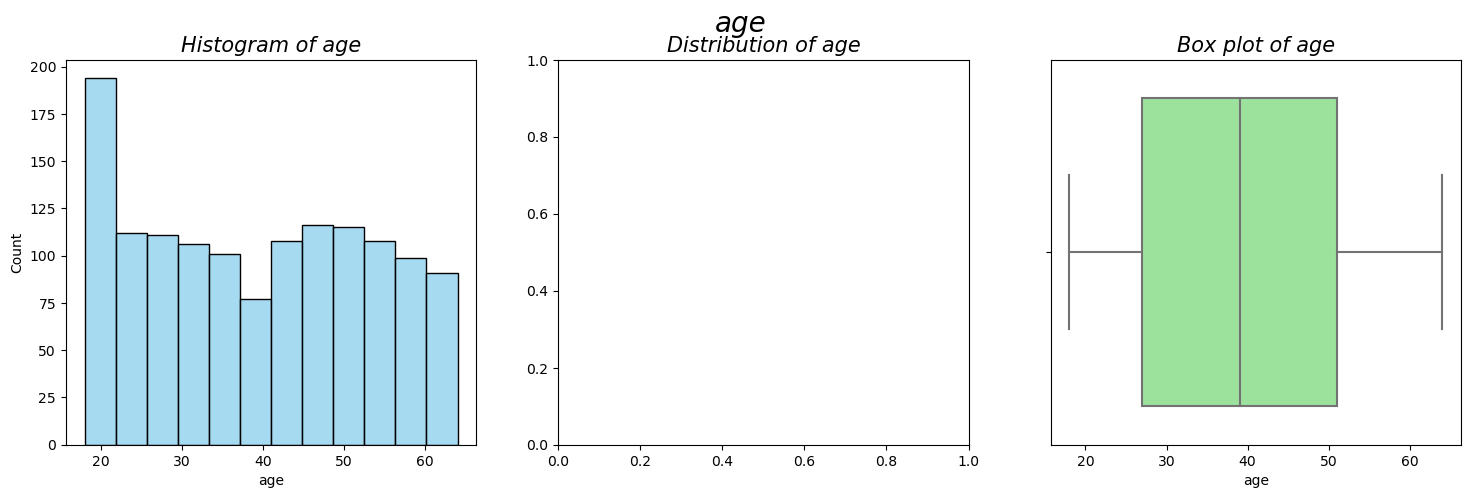

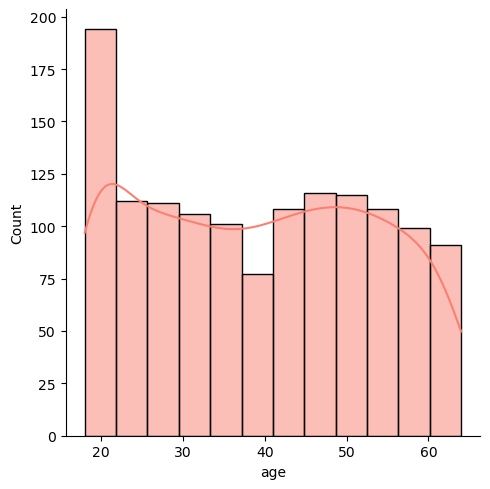

In [57]:
plot_data('age')

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> 
For a chosen random variable, find the probability that:
    1. the person has age 43
    2. the person is from group 40-45 (both inclusive)
    3. has age greater than 45
   Plot the distribution plot for second one using seaborn - sns.distplot()
   To plot distribution plot for the second one, you need to encode the feature. 
   So, using LabelEncoder(), Encode the features and assign them in a seperate feature named 'age grp encode'.   
Note: Round off to two digits
What kind of distribution is it? 
</pre>
</p>
</span>
</div>

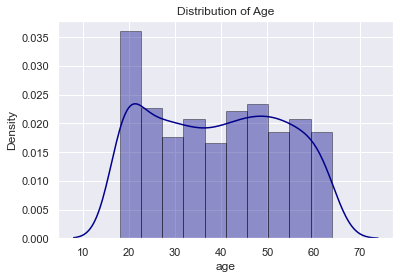

Probability of the person having age 43: 0.02
Probability of the person being from group 40-45: 0.12
Probability of the person having age greater than 45: 0.37


C:\Users\Amit\AppData\Local\Temp\ipykernel_9628\4272352905.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age grp encode'], kde=True)


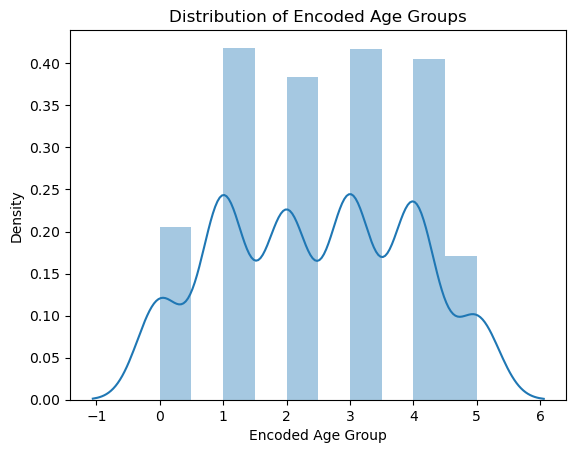

In [98]:
# Define the condition probabilities
total_count = len(df)
prob_age_43 = len(df[df['age'] == 43]) / total_count
prob_group_40_45 = len(df[(df['age'] >= 40) & (df['age'] <= 45)]) / total_count
prob_age_greater_than_45 = len(df[df['age'] > 45]) / total_count

print("Probability of the person having age 43:", round(prob_age_43, 2))
print("Probability of the person being from group 40-45:", round(prob_group_40_45, 2))
print("Probability of the person having age greater than 45:", round(prob_age_greater_than_45, 2))

# Encode the 'age group' feature
label_encoder = LabelEncoder()
df['age grp encode'] = label_encoder.fit_transform(df['age group'])

# Plot the distribution plot for the encoded 'age group' feature
sns.distplot(df['age grp encode'], kde=True)
plt.title('Distribution of Encoded Age Groups')
plt.xlabel('Encoded Age Group')
plt.ylabel('Density')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'sex' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'sex' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

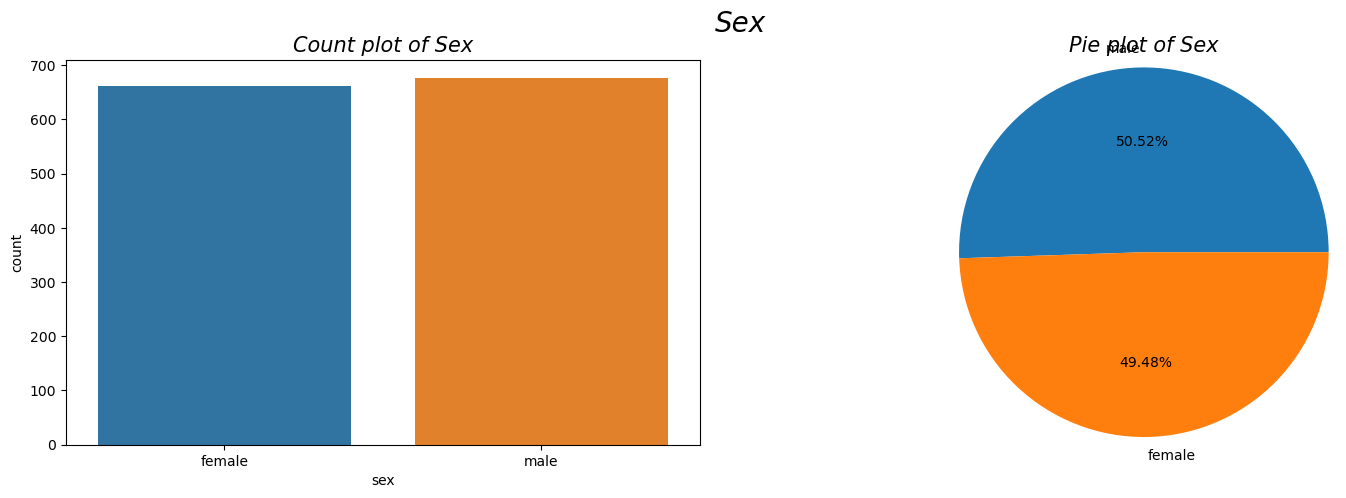

In [99]:
# figsize is given along with the rows=1 and columns=2
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
# super title is given with fontsize
fig.suptitle('Sex', fontsize=20, fontstyle='oblique')

# Count plot for 'sex'
sns.countplot(ax=axes[0], x='sex', data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of Sex', fontstyle='italic', fontsize=15, color='black')

# Pie plot for 'sex'
axes[1].pie(df['sex'].value_counts().values, labels=df['sex'].value_counts().index, radius=1.2, autopct='%1.2f%%')
axes[1].set_title('Pie plot of Sex', fontstyle='italic', fontsize=15, color='black')

plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot with respect to smokers feature as subplots as shown for age feature. Draw your inferences
- Which pair of categories share the highest percentage? 
- Hint hue or value_counts() function to plot. 
</pre>
</p>
</span>
</div>

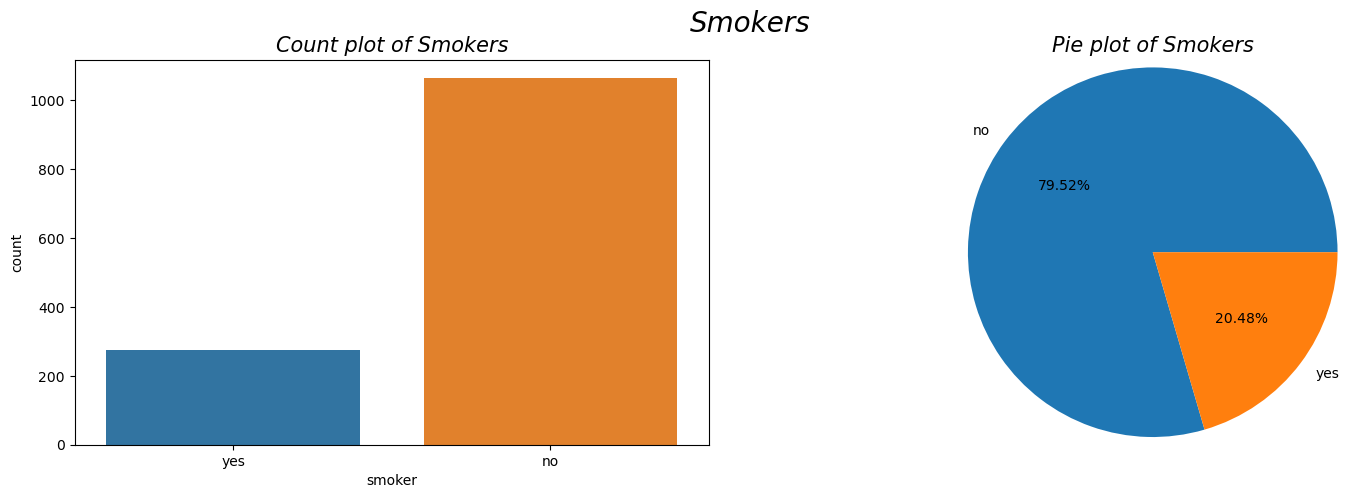

In [100]:
# figsize is given along with the rows=1 and columns=2
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
# super title is given with fontsize
fig.suptitle('Smokers', fontsize=20, fontstyle='oblique')

# Count plot for 'smoker'
sns.countplot(ax=axes[0], x='smoker', data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of Smokers', fontstyle='italic', fontsize=15, color='black')

# Pie plot for 'smoker'
axes[1].pie(df['smoker'].value_counts().values, labels=df['smoker'].value_counts().index, radius=1.2, autopct='%1.2f%%')
axes[1].set_title('Pie plot of Smokers', fontstyle='italic', fontsize=15, color='black')

plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
It is claimed that There are almost equal smokers in men and women. Find out if its true?
Note: Encode the data before using it for statistical tests
</pre>
</p>
</span>
</div>

In [101]:
label_encoder = LabelEncoder()
# Encoding sex Column
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
# Encoding smoker column
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])

In [102]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex_encoded'], df['smoker_encoded'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 7.39291081459996
p-value: 0.006548143503580696


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'smoker' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'smoker' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

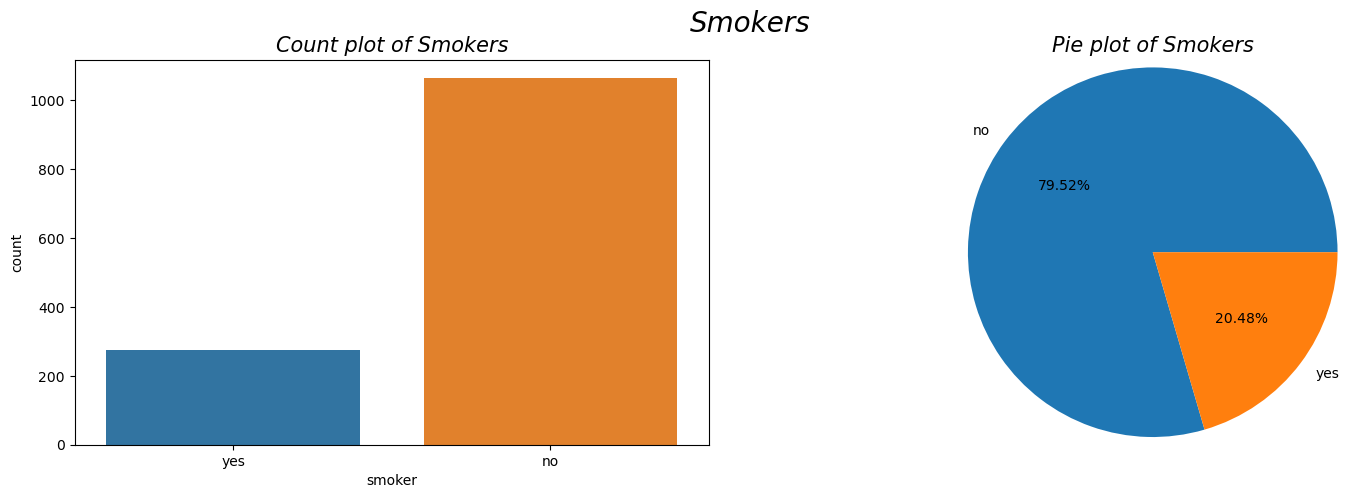

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
# super title is given with fontsize
fig.suptitle('Smokers', fontsize=20, fontstyle='oblique')

# Count plot for 'smoker'
sns.countplot(ax=axes[0], x='smoker', data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of Smokers', fontstyle='italic', fontsize=15, color='black')

# Pie plot for 'smoker'
axes[1].pie(df['smoker'].value_counts().values, labels=df['smoker'].value_counts().index, radius=1.2, autopct='%1.2f%%')
axes[1].set_title('Pie plot of Smokers', fontstyle='italic', fontsize=15, color='black')

plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'bmi' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Create a new feature named 'BMI group' and categorize them as following: <br>
    - < 18.5 : 'Under weight'
    - 18.5 - 25 : 'Healthy weight' 
    - 25 - 30 : 'Overweight'
    - 30 - 40 : 'Obese'
    - >=40 : 'Severely Obese'
</pre>
</p>
</span>
</div>

In [104]:
# Define the bins for BMI groups
bins = [0, 18.5, 25, 30, 40, float('inf')]  # Note: float('inf') represents positive infinity

# Define the labels for BMI groups
labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obese', 'Severely Obese']

# Create the new 'BMI group' feature based on BMI values
df['BMI group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Display the updated dataframe with the new feature
print(df.head())

   age     sex     bmi  children smoker     region      charges age group  \
0   19  female  27.900         0    yes  southwest  16884.92400     10-20   
1   18    male  33.770         1     no  southeast   1725.55230     10-20   
2   28    male  33.000         3     no  southeast   4449.46200     20-30   
3   33    male  22.705         0     no  northwest  21984.47061     30-40   
4   32    male  28.880         0     no  northwest   3866.85520     30-40   

   age grp encode  sex_encoded  smoker_encoded       BMI group  
0               0            0               1      Overweight  
1               0            1               0           Obese  
2               1            1               0           Obese  
3               2            1               0  Healthy weight  
4               2            1               0      Overweight  


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot the below shown plot for the bmi feature
</pre>
</p>
</span>
</div>

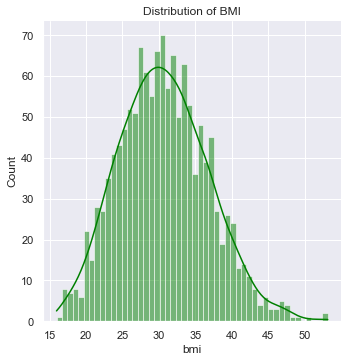

TypeError: title() missing 1 required positional argument: 'label'

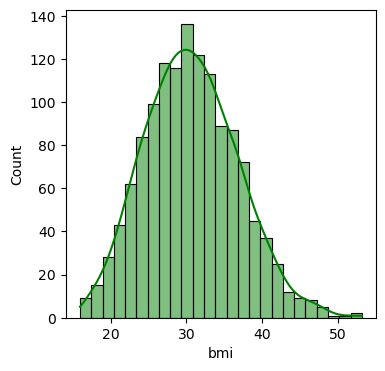

In [106]:
plt.figure(figsize=(4, 4))

# Create the distribution plot for 'bmi'
sns.histplot(df['bmi'], kde=True, color='green')

# Set the title and labels
plt.title( fontstyle='italic', fontsize=15, color='black')
plt.xlabel('BMI')
plt.ylabel('Density')

# Show the plot
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Do obese people have to pay high insurance price? Please perform a statistical test suitable to this and give your opinion on this? 
- Note: You can choose either 'BMI' or 'BMI group' for this. Choose the test accordingly. 
You can also encode 'BMI group feature' and perform the above needed one.
</pre>
</p>
</span>
</div>

In [107]:
bins = [0, 18.5, 25, 30, 40, float('inf')]
labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obese', 'Severely Obese']

# Create the new 'BMI group' feature based on BMI values
df['BMI group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Encode 'BMI group' feature
label_encoder = LabelEncoder()
df['BMI group encoded'] = label_encoder.fit_transform(df['BMI group'])

# Perform ANOVA test
charges_groups = [df[df['BMI group'] == group]['charges'] for group in labels]
anova_result = f_oneway(*charges_groups)

print("ANOVA test result:", anova_result)

# Check p-value
if anova_result.pvalue < 0.05:
    print("There is a significant difference in insurance charges among different BMI groups.")
else:
    print("There is no significant difference in insurance charges among different BMI groups.")


ANOVA test result: F_onewayResult(statistic=14.330439015596687, pvalue=1.8512396782528614e-11)
There is a significant difference in insurance charges among different BMI groups.


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Visualize the above scenario using a plot. How do you visualize it in the most informative way? 
</pre>
</p>
</span>
</div>

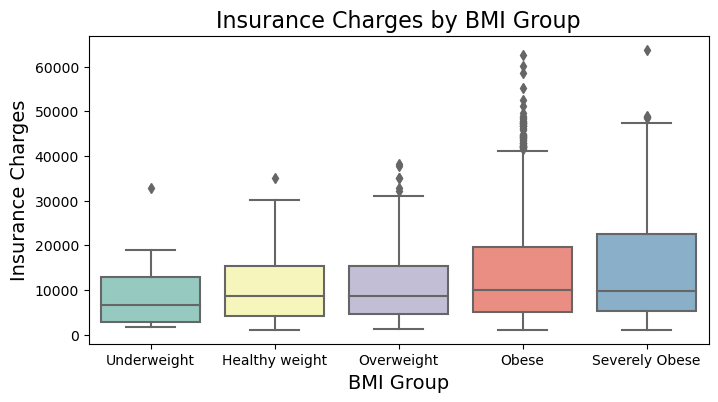

In [108]:
plt.figure(figsize=(8, 4))

# Create the box plot for 'charges' by 'BMI group'
sns.boxplot(x='BMI group', y='charges', data=df, palette='Set3')

# Set the title and labels
plt.title('Insurance Charges by BMI Group', fontsize=16)
plt.xlabel('BMI Group', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)

# Show the plot
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'children' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'children' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

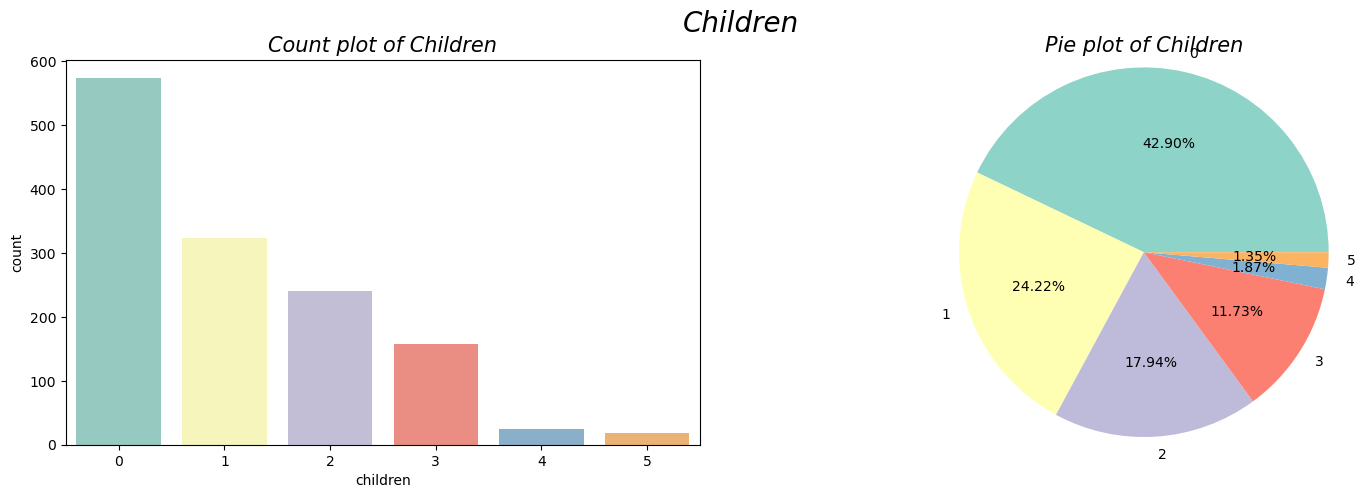

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
# super title is given with fontsize
fig.suptitle('Children', fontsize=20, fontstyle='oblique')

# Count plot for 'children'
sns.countplot(ax=axes[0], x='children', data=df, palette='Set3')
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of Children', fontstyle='italic', fontsize=15, color='black')

# Pie plot for 'children'
axes[1].pie(df['children'].value_counts().values, labels=df['children'].value_counts().index, radius=1.2, autopct='%1.2f%%', colors=sns.color_palette('Set3'))
axes[1].set_title('Pie plot of Children', fontstyle='italic', fontsize=15, color='black')

plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What is count and percentage of people having more than 2 children?
Note: Round the percentage to 2 digits
</pre>
</p>
</span>
</div>

In [110]:
# Count of people having more than 2 children
count_more_than_2_children = df[df['children'] > 2].shape[0]

# Total number of people in the dataset
total_count = df.shape[0]

# Percentage of people having more than 2 children
percentage_more_than_2_children = (count_more_than_2_children / total_count) * 100

# Round the percentage to 2 digits
percentage_more_than_2_children = round(percentage_more_than_2_children, 2)

# Display the results
print("Count of people having more than 2 children:", count_more_than_2_children)
print("Percentage of people having more than 2 children:", percentage_more_than_2_children, "%")

Count of people having more than 2 children: 200
Percentage of people having more than 2 children: 14.95 %


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Create a new dataframe df_1 with region data as index and children categories as column
- It should be in a similar to the data shown in the image here:
- Hint: Use pandas.crosstab() function with index as region, columns as children, aggregation_function as count. 
</pre>
</p>
</span>
</div>

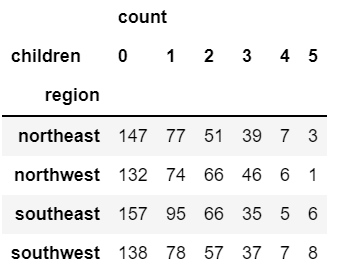

In [111]:
df_1 = pd.crosstab(index=df['region'], columns=df['children'])

df_1.columns.name = 'children'

# Display the resulting dataframe
print(df_1)

children     0   1   2   3  4  5
region                          
northeast  147  77  51  39  7  3
northwest  132  74  66  46  6  1
southeast  157  95  66  35  5  6
southwest  138  78  57  37  7  8


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- From the above dataframe, create a new feature 'Total' from the above dataframe df_1
- Create one more feature Average, and calculate row wise mean() as in figure
- Follow the below image for hints:
- Use sum() function and axis=1 in it.
</pre>
</p>
</span>
</div>

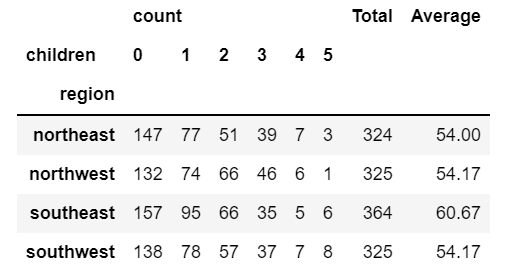

In [112]:
# Create the 'Total' feature
df_1['Total'] = df_1.sum(axis=1)

# Create the 'Average' feature by calculating the row-wise mean and rounding off to 2 decimal places
df_1['Average'] = round(df_1.mean(axis=1), 2)

# Display the resulting dataframe with the new features
print(df_1)

children     0   1   2   3  4  5  Total  Average
region                                          
northeast  147  77  51  39  7  3    324    92.57
northwest  132  74  66  46  6  1    325    92.86
southeast  157  95  66  35  5  6    364   104.00
southwest  138  78  57  37  7  8    325    92.86


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'region' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot the below shown plots w.r.t 'region feature
</pre>
</p>
</span>
</div>

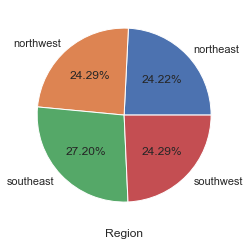

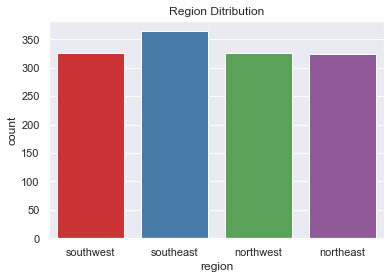

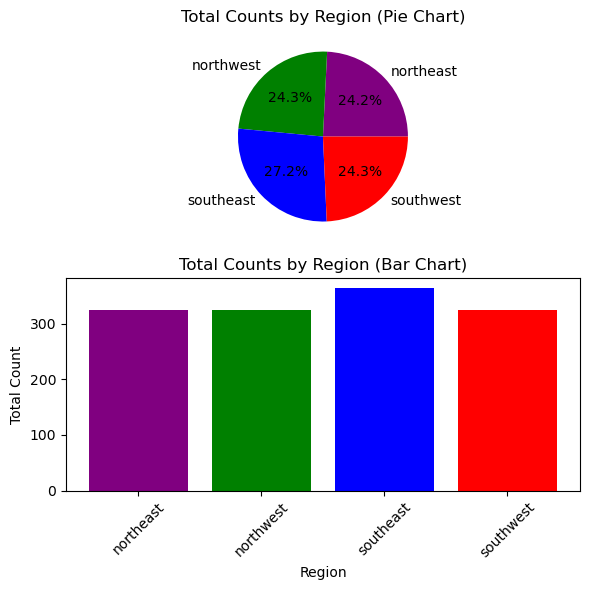

In [118]:

# Define colors for each region
colors = {'southwest': 'red', 'southeast': 'blue', 'northwest': 'green', 'northeast': 'purple'}

# Set the figure size
plt.figure(figsize=(6, 6))

# Plot the pie chart
plt.subplot(2, 1, 1)
plt.pie(df_1['Total'], labels=df_1.index, autopct='%1.1f%%', colors=[colors[region.lower()] for region in df_1.index])
plt.title('Total Counts by Region (Pie Chart)')

# Plot the bar chart
plt.subplot(2, 1, 2)
plt.bar(df_1.index, df_1['Total'], color=[colors[region.lower()] for region in df_1.index])
plt.title('Total Counts by Region (Bar Chart)')
plt.xlabel('Region')
plt.ylabel('Total Count')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'charges' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Create charges mean based on direction using pandas.pivot_table()
</pre>
</p>
</span>
</div>

In [119]:

# Create a pivot table to calculate the mean charges based on direction
charges_mean_pivot = pd.pivot_table(df, values='charges', index='region', columns='sex', aggfunc='mean')

# Display the pivot table
print(charges_mean_pivot)

sex              female          male
region                               
northeast  12953.203151  13854.005374
northwest  12479.870397  12354.119575
southeast  13499.669243  15879.617173
southwest  11274.411264  13412.883576


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- How many people got billed above 15000 in insurance? What percentage of total amount do they contribute to?
</pre>
</p>
</span>
</div>

In [120]:
#Count the number of people whose insurance charges are above $15000
num_above_15000 = df[df['charges'] > 15000].shape[0]

# Calculate the total insurance charges for all individuals
total_charges = df['charges'].sum()

# Calculate the total insurance charges for those who got billed above $15000
total_charges_above_15000 = df[df['charges'] > 15000]['charges'].sum()

# Calculate the percentage contribution of the total charges by those billed above $15000
percentage_contribution = (total_charges_above_15000 / total_charges) * 100

# Print the results
print("Number of people billed above $15000 in insurance:", num_above_15000)
print("Percentage of total amount they contribute to: {:.2f}%".format(percentage_contribution))

Number of people billed above $15000 in insurance: 358
Percentage of total amount they contribute to: 60.75%


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What is maximum charges billed by health insurance and to whom(Index)?
</pre>
</p>
</span>
</div>

In [121]:
# Find the index of the maximum charges billed by health insurance
max_charges_index = df['charges'].idxmax()

# Find the maximum charges billed by health insurance
max_charges = df.loc[max_charges_index, 'charges']

# Print the results
print("Maximum charges billed by health insurance:", max_charges)
print("Index of the person with maximum charges billed:", max_charges_index)

Maximum charges billed by health insurance: 63770.42801
Index of the person with maximum charges billed: 543


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Which age group paid the highest charges by total? 
</pre>
</p>
</span>
</div>

In [122]:
# Define age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, df['age'].max()]
age_labels = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '>60']

# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculate the total charges for each age group
total_charges_by_age_group = df.groupby('age_group')['charges'].sum()

# Find the age group with the highest total charges
highest_charges_age_group = total_charges_by_age_group.idxmax()

# Print the results
print("Age group with the highest total charges:", highest_charges_age_group)

Age group with the highest total charges: 50-60


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- The below image shows the charges distribution of smoker(red: non-smoker, green:smoker)
- Plot a histogram for charges classifying both smokers and non-smokers (Consider your convenient axes scale)
- Find areas from your plot, where given a new charge, probability of a smoker is higher than a non-smoker
- For example, from the plot if a charge 32000 is estimated, the probability of non-smoker is higher than a smoker.
- After performing this, Kindly frame a conclusion if this is a good feature to consider or not. 
</pre>
</p>
</span>
</div>

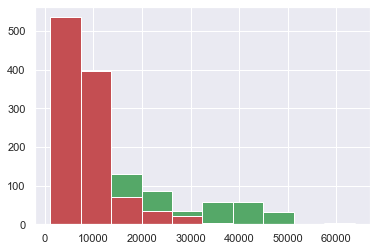

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


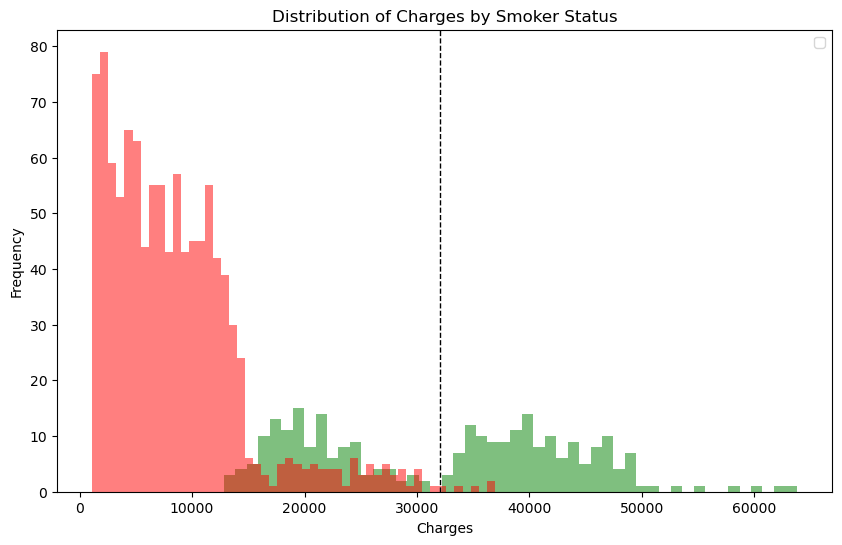

In [129]:
plt.figure(figsize=(10, 6))

# Plot histogram for charges, distinguishing between smokers and non-smokers
plt.hist(df[df['smoker'] == 'yes']['charges'], bins=50, color='green', alpha=0.5)
plt.hist(df[df['smoker'] == 'no']['charges'], bins=50, color='red', alpha=0.5)

# Add labels and title
plt.title('Distribution of Charges by Smoker Status')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()

# Identify areas where the probability of a smoker is higher than a non-smoker
plt.axvline(x=32000, color='black', linestyle='--', linewidth=1)  # Example line at charge 32000

# Show plot
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Repeat the above similar process replacing smoker by sex. Give your insights. 
</pre>
</p>
</span>
</div>

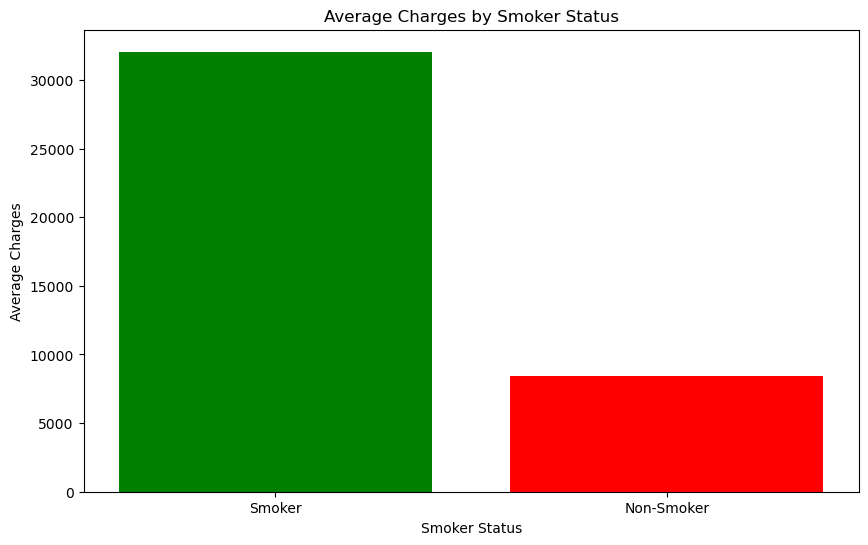

In [133]:

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Calculate the average charges for smokers and non-smokers
avg_charges_smoker = df[df['smoker'] == 'yes']['charges'].mean()
avg_charges_non_smoker = df[df['smoker'] == 'no']['charges'].mean()

# Plot bar chart for average charges by smoker status
plt.bar(['Smoker', 'Non-Smoker'], [avg_charges_smoker, avg_charges_non_smoker], color=['green', 'red'])

# Add labels and title
plt.title('Average Charges by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Average Charges')

# Show plot
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Calculate correlation using corr() function and plot a heatmap for the correlation and use palette = 'viridis'
</pre>
</p>
</span>
</div>

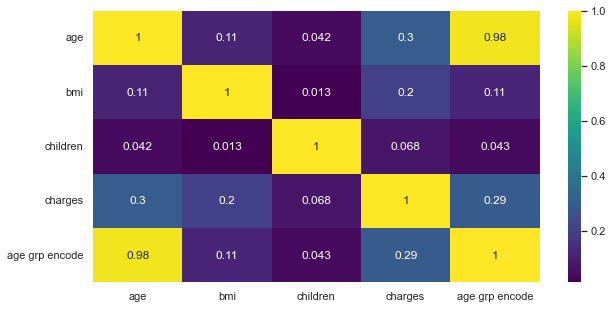

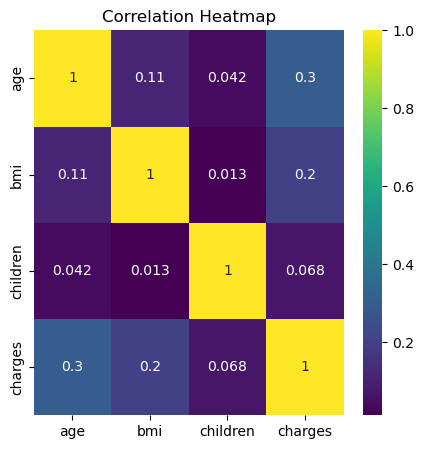

In [136]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- A family is requesting you to estimate the price for the insurance given: 
    condition-1: There are 4 people in family, They are no smokers in the family.
    condition-2: They have 2 children with them aged 14 and 17
    condition-3: Four people in the family, Father aged 42 and mother aged 40. 
    Based on the information above, Show them the data that is approximately similar (needn't be exact) to this family. 
    Collectively, what can be the insurance price collectively to be paid by the family? 
</pre>
</p>
</span>
</div>

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> WEEK-II </p> </span> </div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Now, Its time to build a model for prediction. Before that, Encode all the categorical features to train the model. 
Hints: Use pandas.replace() or pandas.map() to encode the variables
You can also use LabelEncoder to label the data. 
You can also pandas.get_dummies() to segregate the categorical data. 
</pre>
</p>
</span>
</div>

In [138]:
# Replace categorical values with numerical labels using replace()
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})

# Map categorical values to numerical labels using map()
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
df['region'] = df['region'].map(region_mapping)

# Display the encoded dataframe
print(df.head())

   age  sex     bmi  children  smoker  region      charges age group  \
0   19    1  27.900         0       1       0  16884.92400     10-20   
1   18    0  33.770         1       0       1   1725.55230     10-20   
2   28    0  33.000         3       0       1   4449.46200     20-30   
3   33    0  22.705         0       0       2  21984.47061     30-40   
4   32    0  28.880         0       0       2   3866.85520     30-40   

   age grp encode  sex_encoded  smoker_encoded       BMI group  \
0               0            0               1      Overweight   
1               0            1               0           Obese   
2               1            1               0           Obese   
3               2            1               0  Healthy weight   
4               2            1               0      Overweight   

   BMI group encoded age_group  
0                  2     10-20  
1                  1     10-20  
2                  1     20-30  
3                  0     30-40  
4    

In [139]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features using LabelEncoder
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])

# Display the encoded dataframe
print(df.head())

   age  sex     bmi  children  smoker  region      charges age group  \
0   19    1  27.900         0       1       0  16884.92400     10-20   
1   18    0  33.770         1       0       1   1725.55230     10-20   
2   28    0  33.000         3       0       1   4449.46200     20-30   
3   33    0  22.705         0       0       2  21984.47061     30-40   
4   32    0  28.880         0       0       2   3866.85520     30-40   

   age grp encode  sex_encoded  smoker_encoded       BMI group  \
0               0            1               1      Overweight   
1               0            0               0           Obese   
2               1            0               0           Obese   
3               2            0               0  Healthy weight   
4               2            0               0      Overweight   

   BMI group encoded age_group  
0                  2     10-20  
1                  1     10-20  
2                  1     20-30  
3                  0     30-40  
4    

In [140]:
# Use get_dummies() to encode categorical features
encoded_df = pd.get_dummies(df, columns=['region'], prefix='region')

# Display the encoded dataframe
print(encoded_df.head())

   age  sex     bmi  children  smoker      charges age group  age grp encode  \
0   19    1  27.900         0       1  16884.92400     10-20               0   
1   18    0  33.770         1       0   1725.55230     10-20               0   
2   28    0  33.000         3       0   4449.46200     20-30               1   
3   33    0  22.705         0       0  21984.47061     30-40               2   
4   32    0  28.880         0       0   3866.85520     30-40               2   

   sex_encoded  smoker_encoded       BMI group  BMI group encoded age_group  \
0            1               1      Overweight                  2     10-20   
1            0               0           Obese                  1     10-20   
2            0               0           Obese                  1     20-30   
3            0               0  Healthy weight                  0     30-40   
4            0               0      Overweight                  2     30-40   

   region_0  region_1  region_2  region_3  


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Now, Its time to scale the numerical features. 
You can use any scalers. Standard Scaler, Minmax scaler, Robust Scaler. Mention the reasons. 
</pre>
</p>
</span>
</div>

In [141]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define numerical features to scale
numerical_features = ['age', 'bmi', 'children', 'charges']

# Scale numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled dataframe
print(df.head())

        age  sex       bmi  children  smoker  region   charges age group  \
0  0.021739    1  0.321227       0.0       1       0  0.251611     10-20   
1  0.000000    0  0.479150       0.2       0       1  0.009636     10-20   
2  0.217391    0  0.458434       0.6       0       1  0.053115     20-30   
3  0.326087    0  0.181464       0.0       0       2  0.333010     30-40   
4  0.304348    0  0.347592       0.0       0       2  0.043816     30-40   

   age grp encode  sex_encoded  smoker_encoded       BMI group  \
0               0            1               1      Overweight   
1               0            0               0           Obese   
2               1            0               0           Obese   
3               2            0               0  Healthy weight   
4               2            0               0      Overweight   

   BMI group encoded age_group  
0                  2     10-20  
1                  1     10-20  
2                  1     20-30  
3             

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Why do you think we need to scale the features? 
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Remove unnecessary features. 
</pre>
</p>
</span>
</div>

In [159]:
# List of unnecessary features to remove
unnecessary_features = ['age group', 'age_group', 'BMI group']

# Remove unnecessary features from the dataframe
df = df.drop(columns=unnecessary_features)

# Display the updated dataframe
print(df.head())

        age  sex       bmi  children  smoker  region   charges  \
0  0.021739    1  0.321227       0.0       1       0  0.251611   
1  0.000000    0  0.479150       0.2       0       1  0.009636   
2  0.217391    0  0.458434       0.6       0       1  0.053115   
3  0.326087    0  0.181464       0.0       0       2  0.333010   
4  0.304348    0  0.347592       0.0       0       2  0.043816   

   age grp encode  BMI group encoded  
0               0                  2  
1               0                  1  
2               1                  1  
3               2                  0  
4               2                  2  


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Now, the data is cleaned and preprocessed. Lets build the model using Linear Regression
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Split the data into train data and test data using train_test_split() in the ratio 4:1
</pre>
</p>
</span>
</div>

In [161]:
# Run this cell
X = df.drop('charges',axis=1)
y = df['charges']

In [162]:
# Run this cell
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('Train size: ',X_train.shape,y_train.shape)
print('Test size: ',X_test.shape,y_test.shape)

Train size:  (1070, 8) (1070,)
Test size:  (268, 8) (268,)


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- We need to perform the Linear Regression for the whole data to create a summary and understand the assumptions. Follow the steps and run the below cells. 
- Run the below cell. You need not right any code in the cells that mentioned "Run the cell"
</pre>
</p>
</span>
</div>

In [163]:
# Run this cell
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [164]:
# Run this cell
print(f'Coefficients: {linear_reg.coef_}')
print(f'Intercept: {linear_reg.intercept_}')
print(f'R^2 score: {linear_reg.score(X, y)}')

Coefficients: [ 1.89312778e-01  2.28435642e-03  2.13071761e-01  3.76097073e-02
  3.80145613e-01  5.81732437e-03 -1.72586187e-04 -9.79729747e-03]
Intercept: -0.060323035388772345
R^2 score: 0.7525484939336996


##  <mark><span  style= "font-family: Times New Roman">Assumptions: </span> </mark> <a class="anchor" id="Assumptions"></a>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumptions for Linear Regression:
Lets check the extent upto where the assumptions of Linear Regression is valid:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- We need to perform Ordinary least squares to understand these assumptions. 
- Run the below cell. You need not right any code in the cells that are mentioned "Run the cell"
</pre>
</p>
</span>
</div>

In [165]:
# Run this cell to understand the summary.
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     505.2
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        12:49:40   Log-Likelihood:                 1235.3
No. Observations:                1338   AIC:                            -2453.
Df Residuals:                    1329   BIC:                            -2406.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0603      0.010     -5.921      0.000      -0.080      -0.040
age                   0.1893      0.043      4.388      0.000       0.105       0.274
sex                   0.0023      0.005      0.431      0.666      -0.008       0.013
bmi                   0.2131      0.017     12.408      0.000       0.179       0.247
children              0.0376      0.011      3.432      0.001       0.016       0.059
smoker                0.3801      0.007     57.978      0.000       0.367       0.393
region                0.0058      0.002      2.405      0.016       0.001       0.011
age grp encode       -0.0002      0.009     -0.019      0.985      -0.018       0.017
BMI group encoded    -0.0098      0.003     -3.118      0.002      -0.016      -0.004
==============================================================================
Omnibus:                      299.436   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.753
Skew:                           1.210   Prob(JB):                    1.69e-155
Kurtosis:                       5.632   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption-1 : No Autocorrelation.
From the above summary, Note the Durbin Watson value.
Durbin-Watson test is a statistical test that works for finding autocorrelation value. It lies generally between 0-4.
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Input the Durbin watson value and Write an if statement to print:
"Positive Correlation" for value greater than 2
"Zero correlation" for value equal to 2
"Negative Correlation" for value lesser than 2
</pre>
</p>
</span>
</div>

C:\Users\Amit\AppData\Local\Temp\ipykernel_9628\3201384818.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


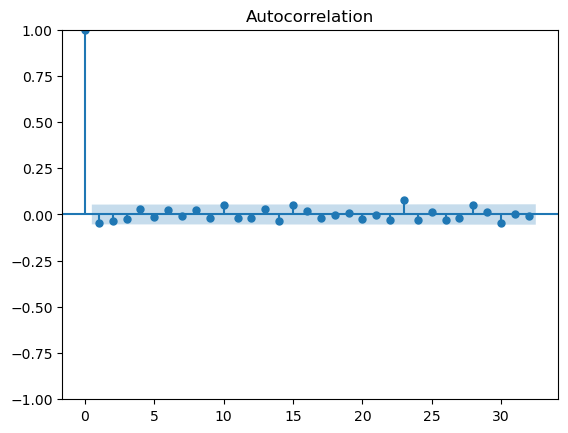

In [166]:
# Run the cell below
# this plot is called autocorrelation plot. you will be working on this later in the course.
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lin_reg.resid,alpha=0.05)
acf.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption-2 : Normality of Residuals.
From the above summary, Note the Jarque bera value.
Normality is an assumption for many statistical tests. Jarque-bera value is a test for checking normality. 
We are performing this here to check the normality for the different of actual and predicted values.
</pre>
</p>
</span>
</div>

In [167]:
# Run the below cell
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

SignificanceResult(statistic=712.7529863195227, pvalue=1.6891006952532215e-155)


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Input the Jarque bera value and p-value as 0.05 and Write an if statement to print:
"Normal distribution" for value greater than p-value
"Non-normal distribution" for value lesser than p-value
</pre>
</p>
</span>
</div>

C:\Users\Amit\AppData\Local\Temp\ipykernel_9628\1340316266.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lin_reg.resid)


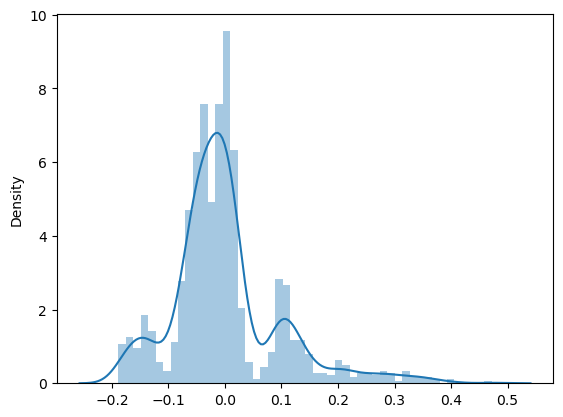

In [174]:
# Validate your above answer by running the cell
import seaborn as sns
sns.distplot(lin_reg.resid)
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Asssumption 3 - Linearity of residuals
Run the below cell to check the Linearity in the model
</pre>
</p>
</span>
</div>

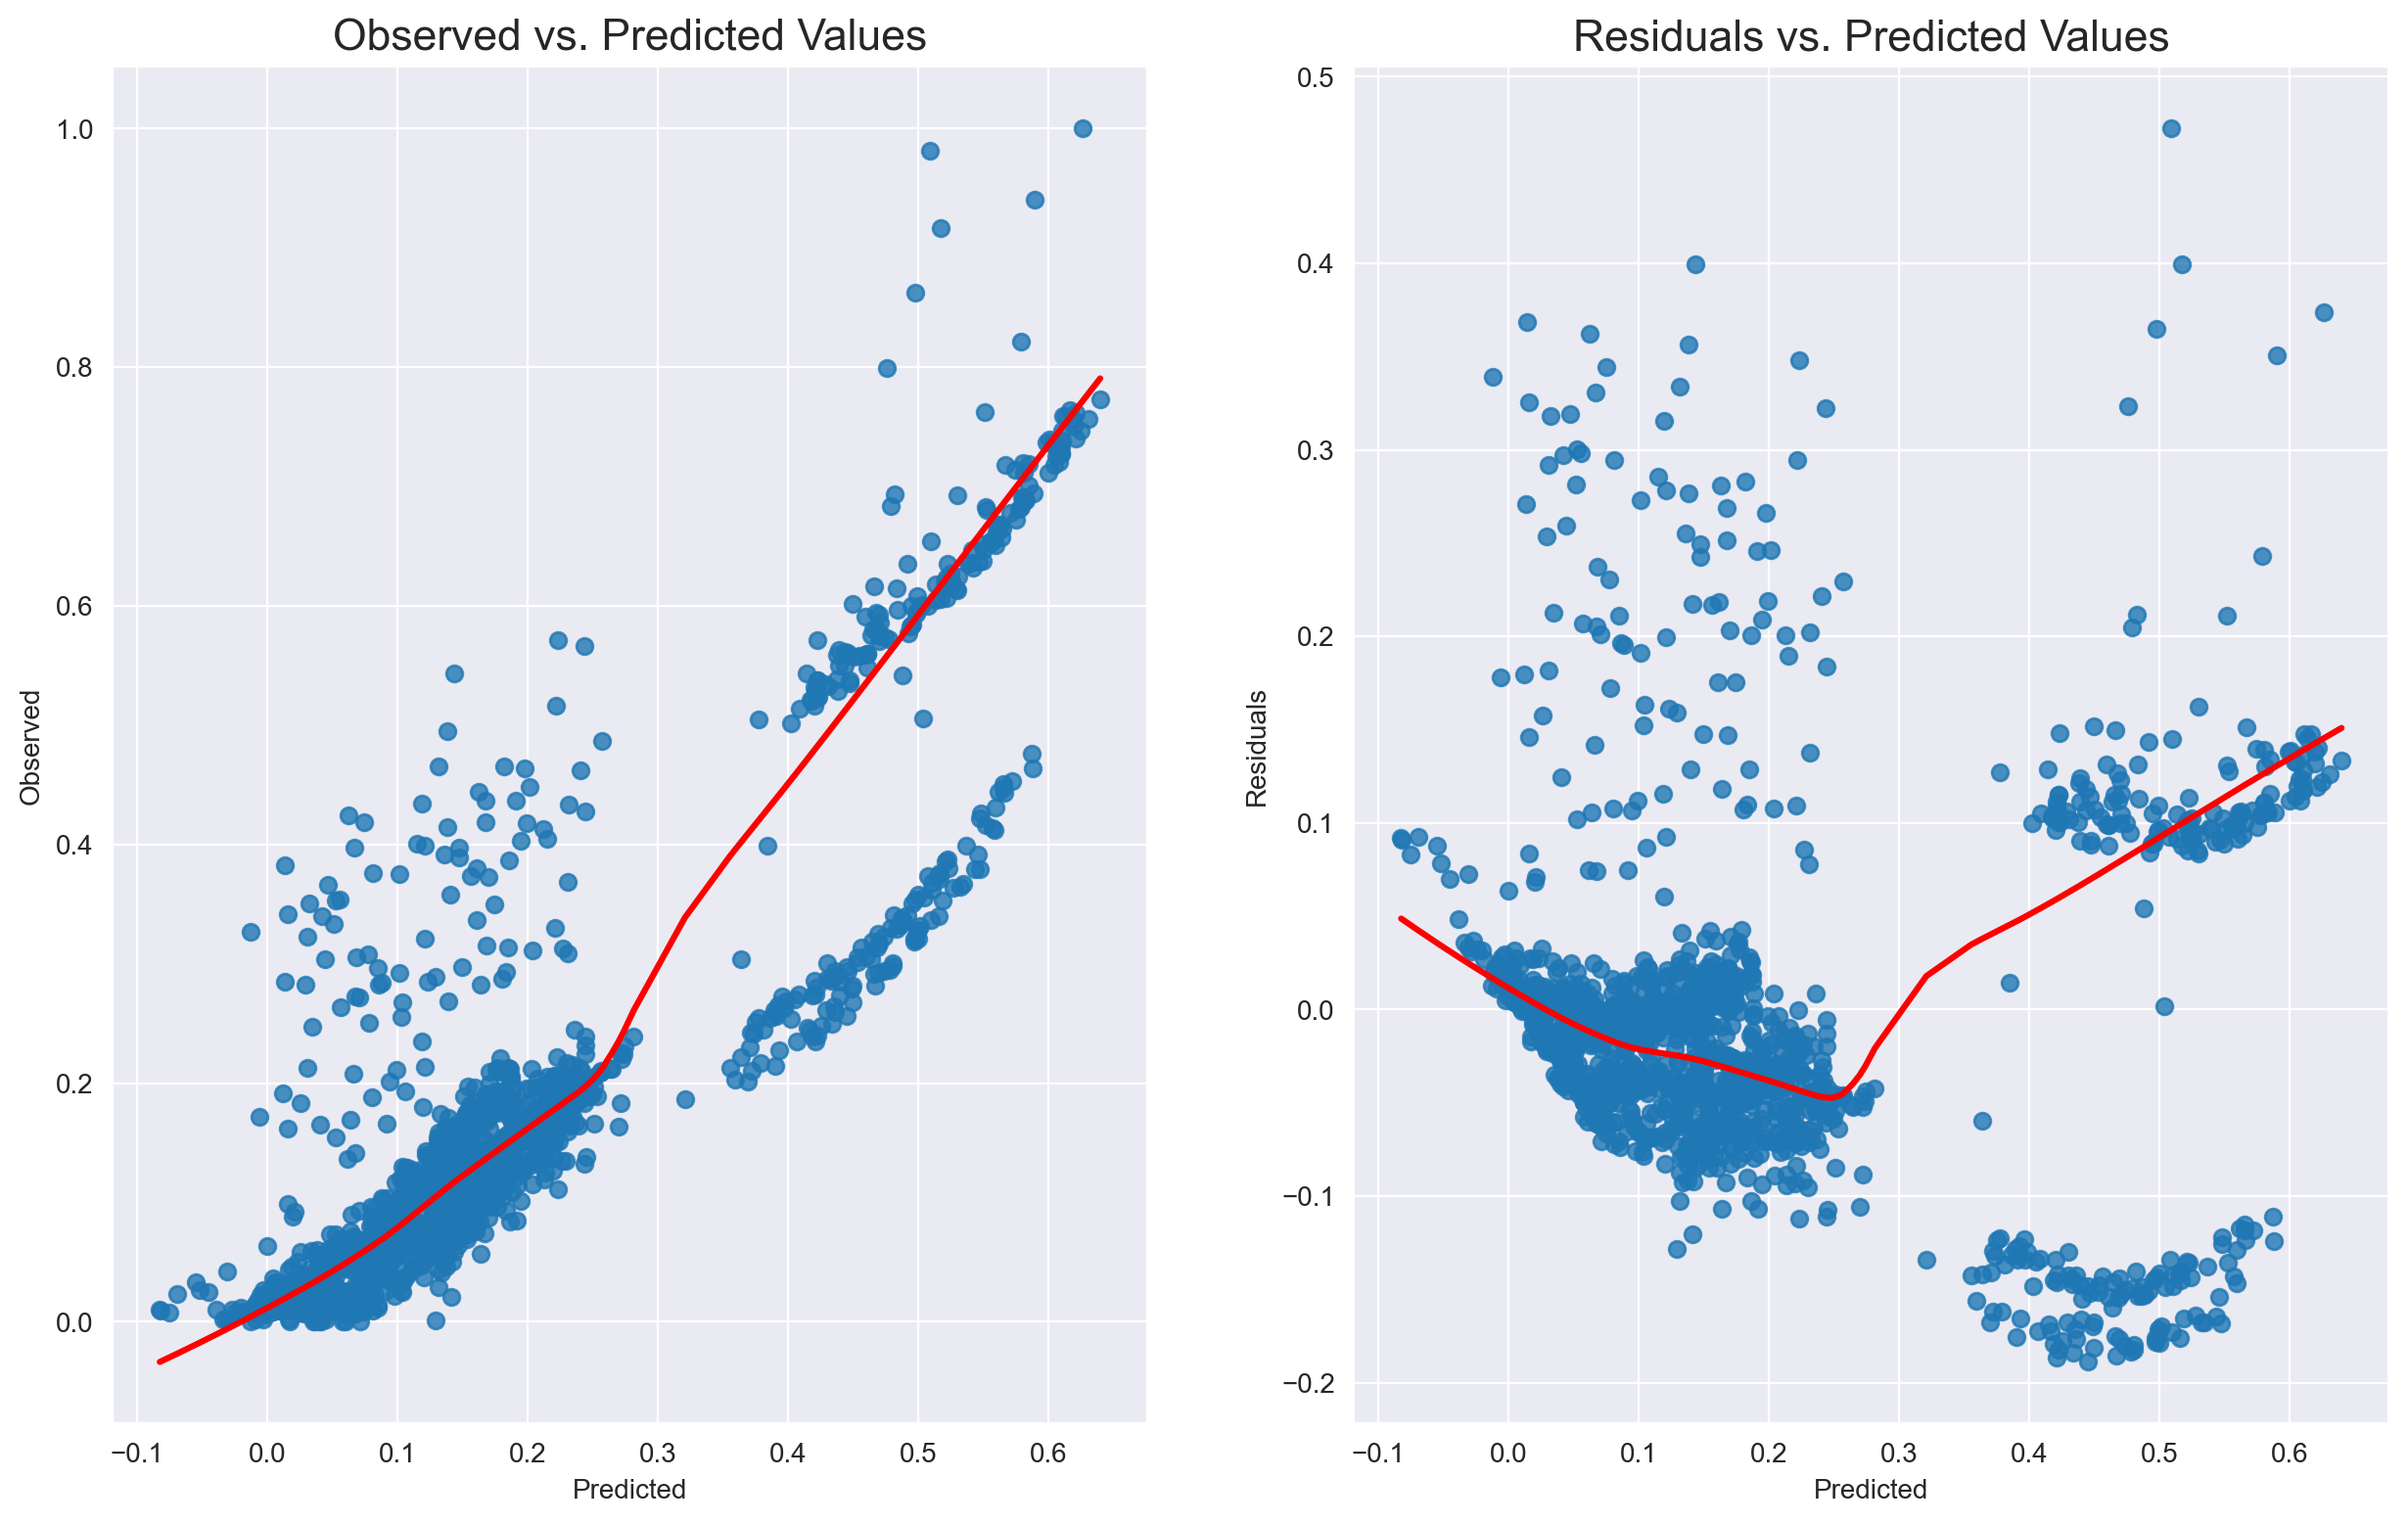

In [175]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

# function to test the linearity. Input the model(Linear Regression and the output)
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    # Finding the predictions from the model
    fit_values = model.predict()
    #Residuals 
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    # Plotting a regression plot for the above found values
    sns.regplot(x=fit_values, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Run the below cell to perform Rainbow test. 
Rainbow test is performed to test linearity. Even though there is no good linearity, it can be used to achieve the linearity from a subsample data.
</pre>
</p>
</span>
</div>

In [176]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.1334032622674317, 0.05343276430638707)

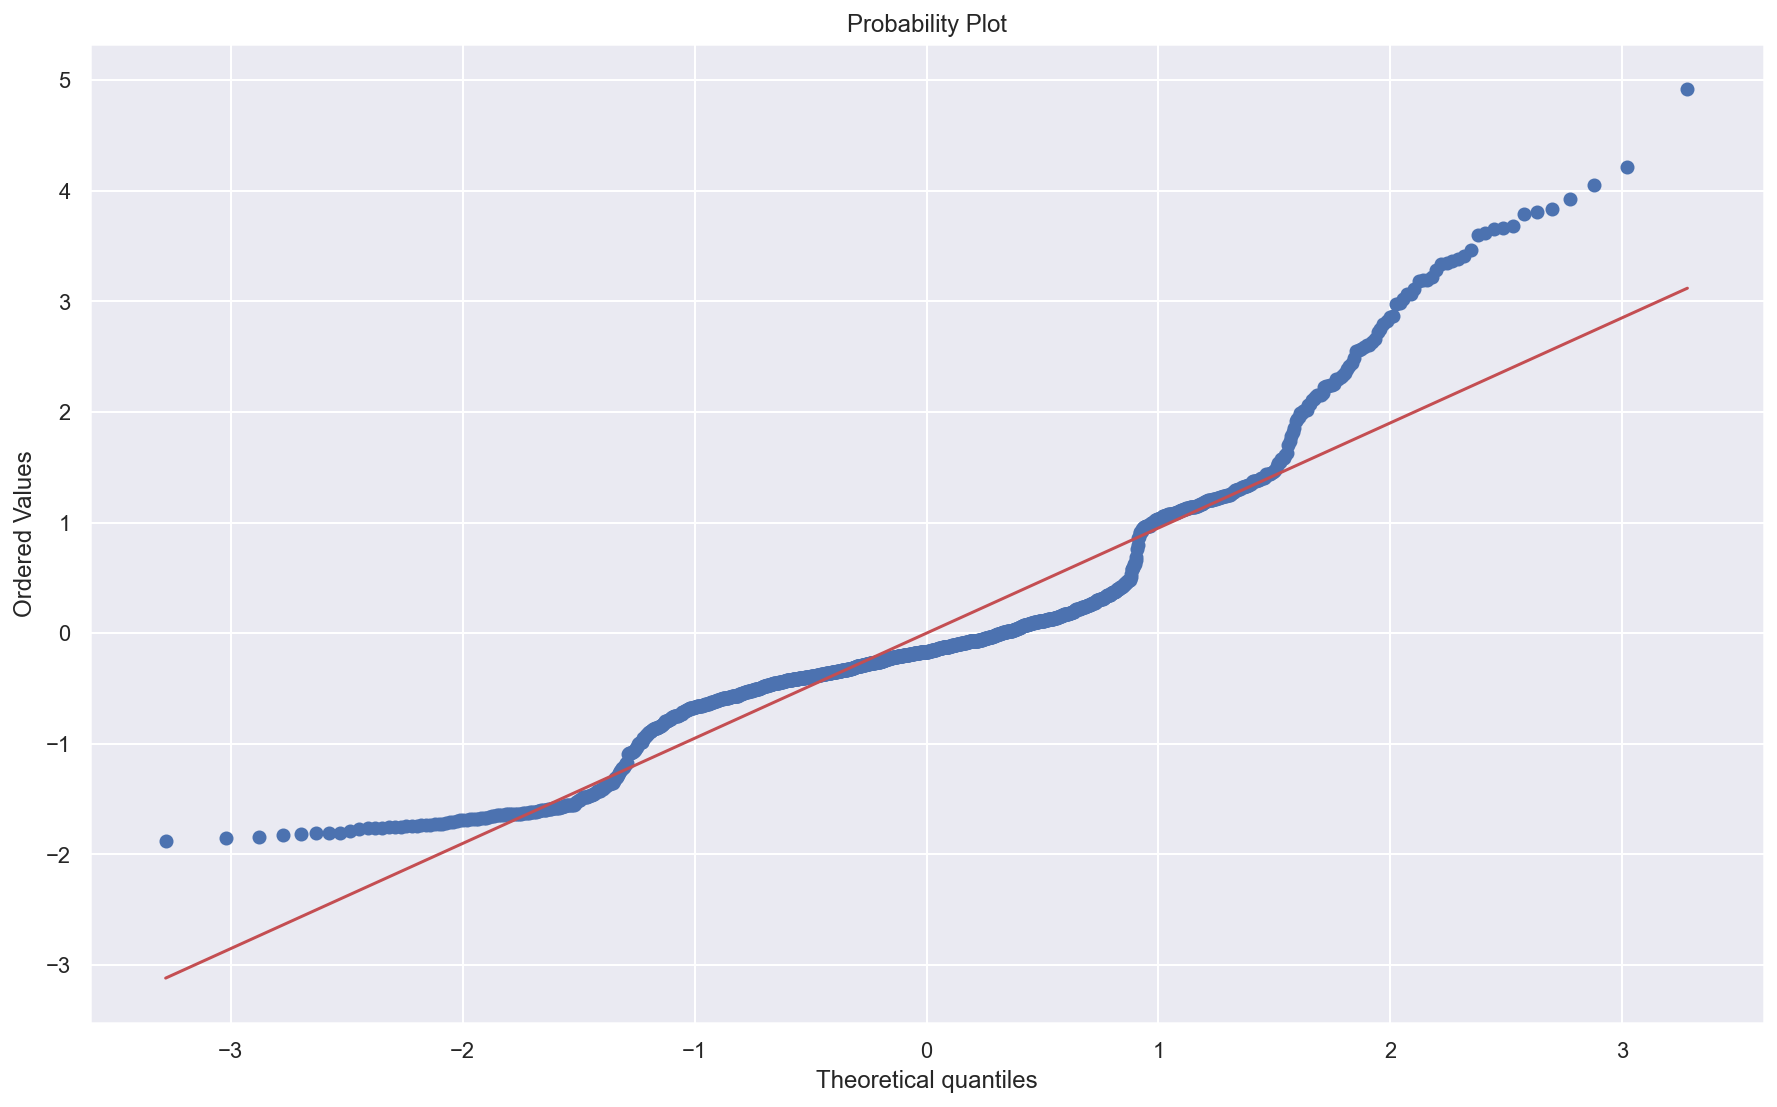

In [215]:
# Run the below cell and understand the residual distribution
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
# We are plotting studentized residuals
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [216]:
lin_reg.resid.mean()
# As the value is very much close it zero .We can say linearity is present.

1.0233468283035916e-15

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Run the below cell to check the homoscedasticity in the model
</pre>
</p>
</span>
</div>

**We are plotting the same as above plots, but for checking homoscedasticity (uniform variance)**

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'sqrt(abs(Residuals))')]

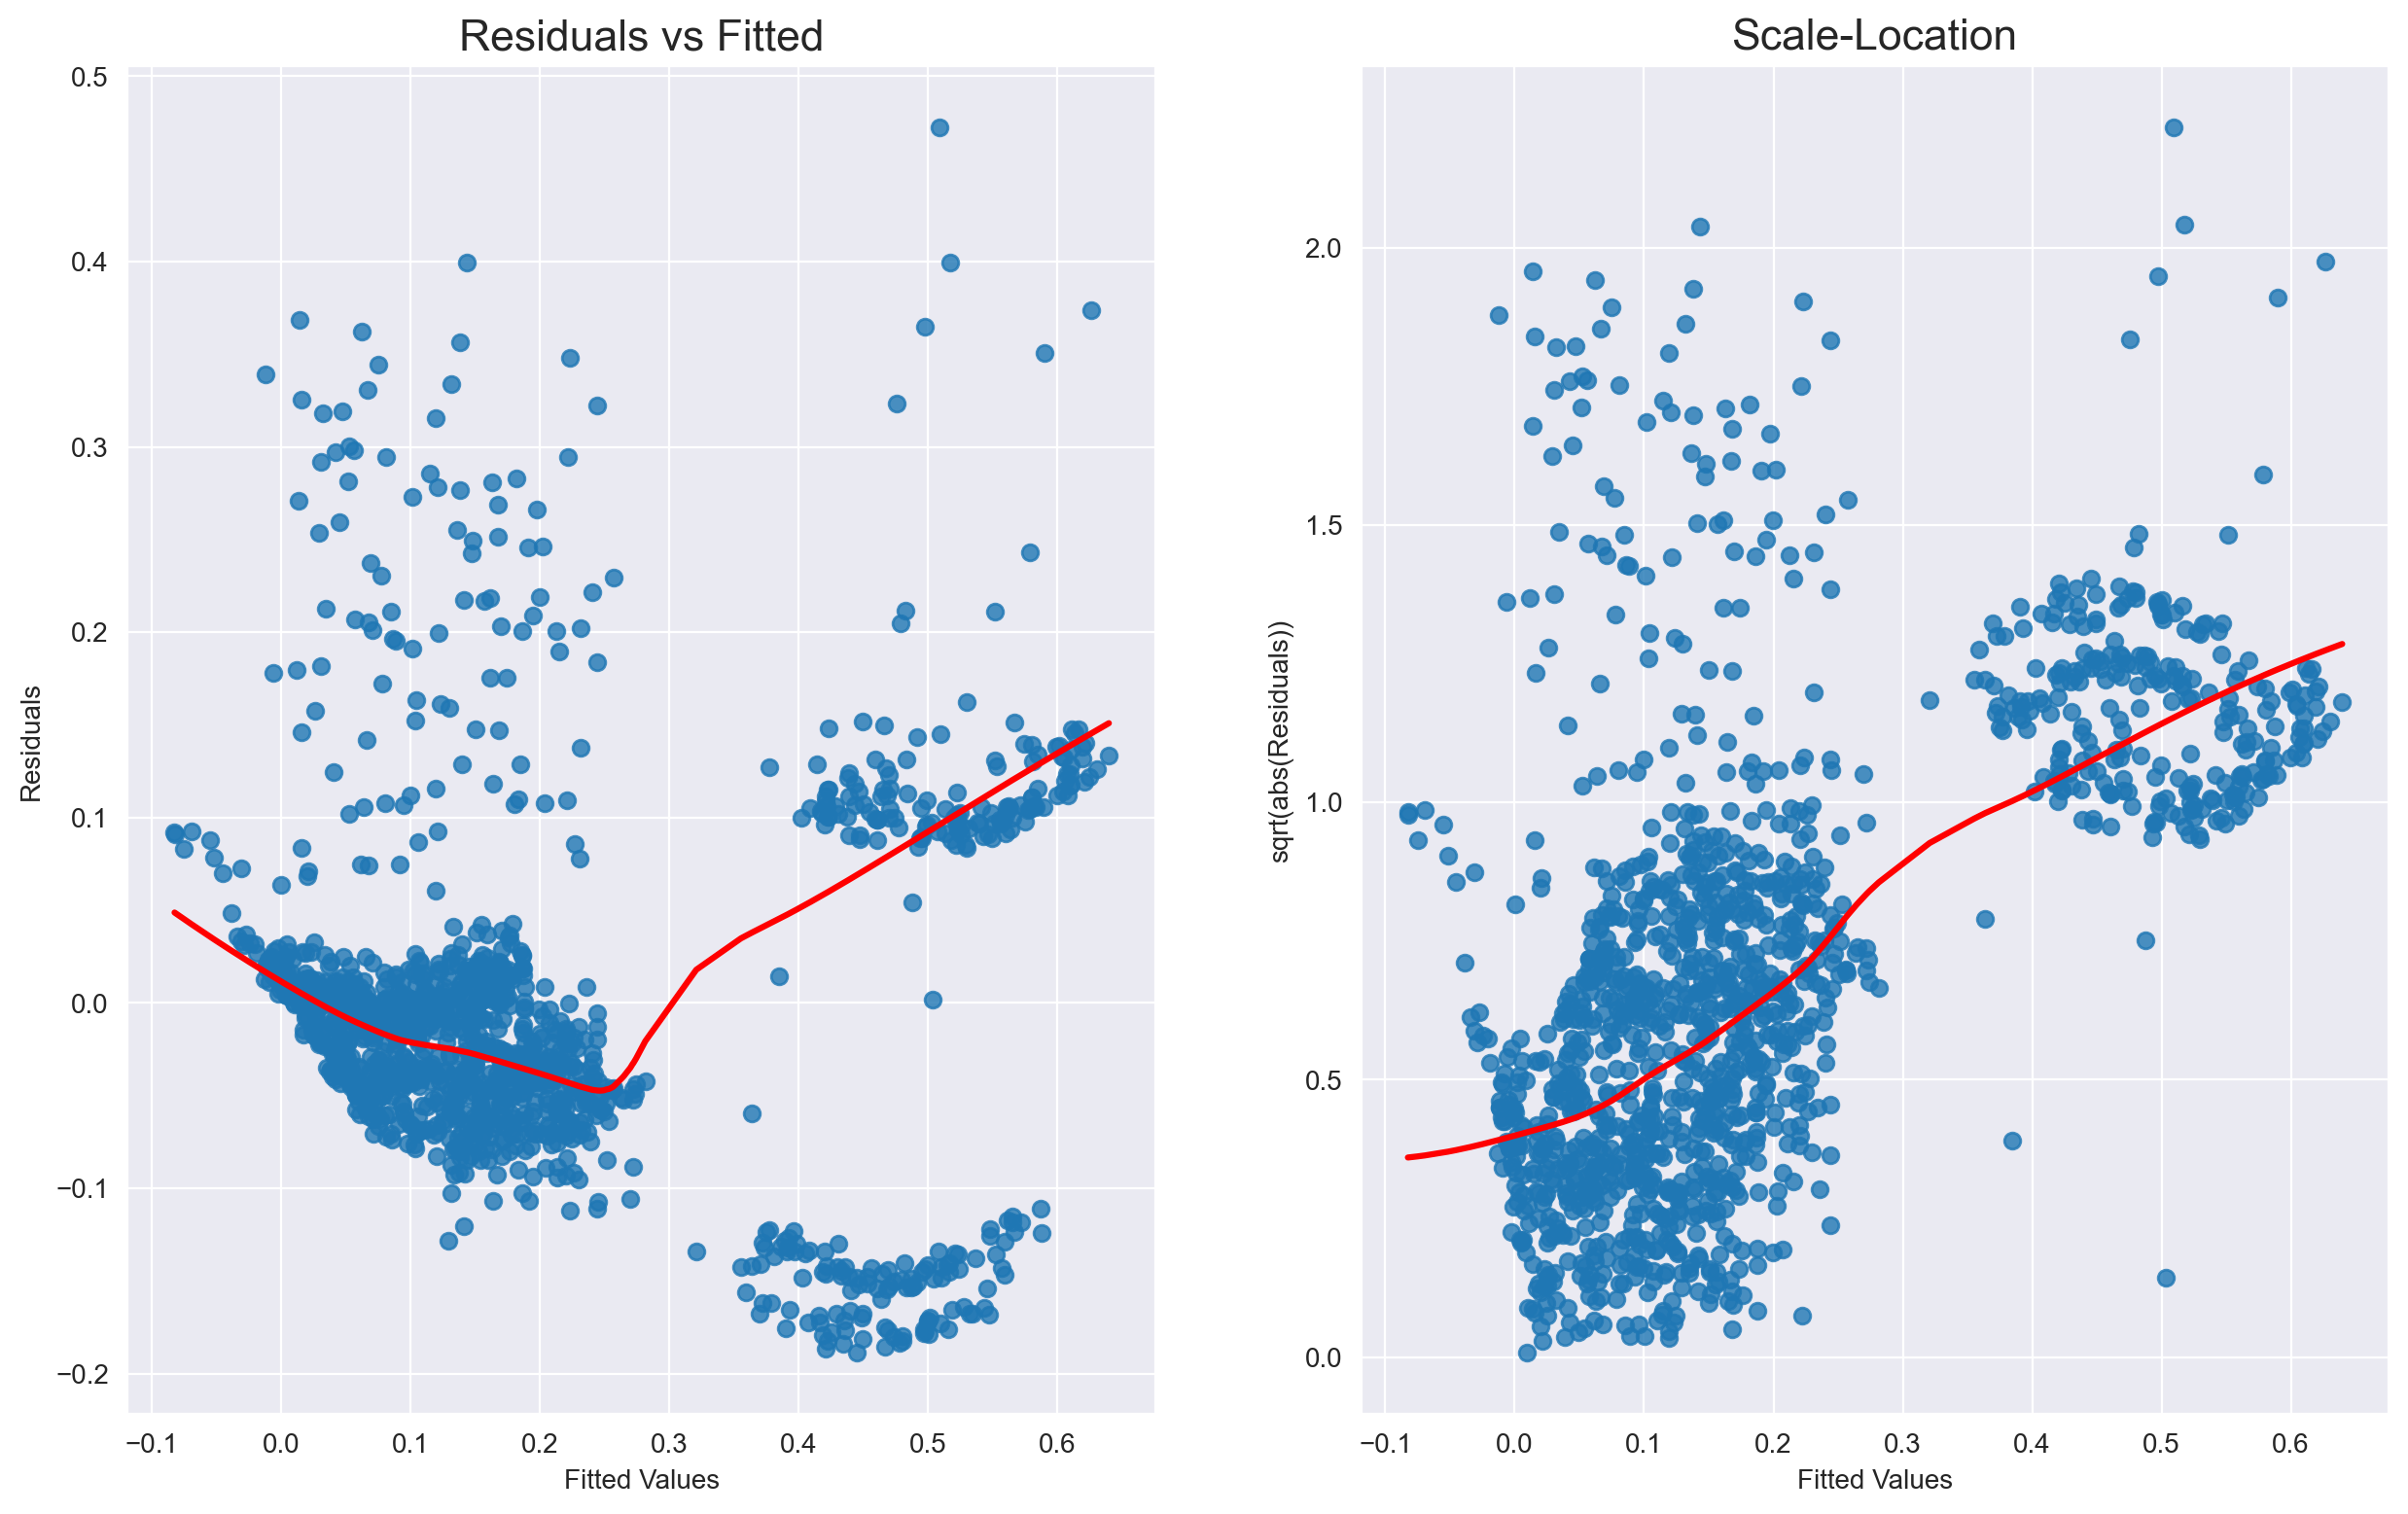

In [177]:
from statsmodels.compat import lzip
from statsmodels.compat import lzip

model = lin_reg
resids = model.resid
fit_values = model.predict()
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

# Regression plots for residual values and predicted values
sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

# Regression plots for scaled residuals and predicted values
sns.regplot(x=fit_values, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

In [178]:
# Goldfeld quandt test is used to check the homoscedasticity in regression analysis
# Run the below cell
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)
# WE fail to reject the null hypothesis which is Homoscedasticity is present and we can continue with the original regression

[('F statistic', 0.9539689751670677), ('p-value', 0.727431487954447)]

In [179]:
print('p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.')

p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption 5- NO MULTI COLLINEARITY
Run the below cell to check the Multicollinearity in the model
We use Variation inflation factors. The name itself says to determine the factors that inflate the variance if any additional variable is added to the regression.
</pre>
</p>
</span>
</div>

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We added this constant in summary
# The constant term is checked with every feature in the data and the measure is calculated. 
# If there is a very huge value for vif, then there might be chance of high collinearity 
# Here, there are no such high ranges, so it is fine to assume no multicollinearity and proceed with original regression.
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.set_option("display.Max_columns",None)
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,age,sex,bmi,children,smoker,region,age grp encode,BMI group encoded
vif,24.958831,1.009039,1.140925,1.003403,1.007036,1.026529,24.98868,1.097227


### By now, we have completed checking the assumptions for Linear Regression. 
### Now, we are ready to build the model with train and test data and check the working of the model.

In [221]:
# As the data is split into train data and test data, Lets start the model
# Step-1: Create an instance of the Linear Regression, use fit() to fit the model to the input data
# Step-2: USe predict() and predict the output for test data

In [183]:
#  Create an instance of the Linear Regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

#  Use the trained model to make predictions on the test data
y_pred = linear_reg.predict(X_test)  
print("Predicted Data :- ")
print(y_pred)

Predicted Data :- 
[ 0.15971978  0.13053373  0.57601855  0.24572484  0.0548196   0.05565169
 -0.00126903  0.2150993   0.12946043  0.10322303  0.06330904  0.13390198
  0.11102091  0.0585954   0.41827188  0.14718952  0.17147365  0.0838955
  0.10550478  0.41607187  0.52827652  0.21535968  0.17160566  0.49071489
  0.05676619  0.13463626 -0.0351722   0.14579201  0.03564179  0.15103957
  0.11468622  0.61227923  0.23466003  0.20684993  0.38660459  0.05367936
  0.19476539  0.47658648  0.51846621  0.04059045  0.0559922   0.04287667
  0.4604418   0.61805645  0.43687269  0.06530749  0.14528785  0.0955056
  0.04858162  0.16231417  0.07759339  0.02860512  0.49794176  0.59992549
  0.22947517  0.10266904  0.08392631  0.12067658  0.11851511  0.17849691
  0.00186837  0.60403799  0.22709749  0.17001863  0.21280235  0.20917293
  0.4029786   0.49846257  0.0093978   0.14521113  0.16632068  0.16249209
  0.3706357   0.24109253  0.17010509  0.17290763  0.0955351   0.14283513
  0.45398591  0.60701031  0.166029

##  <mark><span  style= "font-family: Times New Roman">Evaluation metrics </span> </mark> <a class="anchor" id="Evaluation_metrics"></a>

In [223]:
# Calculate the metrics mean_absolute_error and mean_squared_error

In [186]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.06300041023352297


In [187]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.008145355095498569


In [191]:
# Calculate the metrics r2_score and adjusted_r2_score for both train and test data
# Calculate R2 score for train data
r2_train = r2_score(y_train, linear_reg.predict(X_train))

# Calculate R2 score for test data
r2_test = r2_score(y_test, y_pred)

print("R2 score for train data:", r2_train)
print("R2 score for test data:", r2_test)
print("*****************************************************")
n = len(X_train)

# Number of features
k = X_train.shape[1]

# Calculate adjusted R2 score for train data
adjusted_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - k - 1))

# Calculate adjusted R2 score for test data
adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - k - 1))

print("Adjusted R2 score for train data:", adjusted_r2_train)
print("Adjusted R2 score for test data:", adjusted_r2_test)

R2 score for train data: 0.7392786622604437
R2 score for test data: 0.7990998937176017
*****************************************************
Adjusted R2 score for train data: 0.7373128086299852
Adjusted R2 score for test data: 0.7975850955552461


In [192]:
# Prediction on training Data
y_train_pred = linear_reg.predict(X_train)
print(y_train_pred)

[0.52046197 0.04657453 0.47812027 ... 0.06762442 0.06224156 0.02722266]


In [193]:
# R square in train data
r2_train = r2_score(y_train, y_train_pred)

print("R2 score for training data:", r2_train)

R2 score for training data: 0.7392786622604437


In [194]:
# Adjusted R square in train data
n_train = len(X_train)

# Number of features in the training data
k_train = X_train.shape[1]

# Calculate adjusted R2 score for training data
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))

print("Adjusted R2 score for training data:", adjusted_r2_train)

Adjusted R2 score for training data: 0.7373128086299852


In [195]:
# Prediction on test Data
y_test_pred = linear_reg.predict(X_test)
print(y_test_pred)

[ 0.15971978  0.13053373  0.57601855  0.24572484  0.0548196   0.05565169
 -0.00126903  0.2150993   0.12946043  0.10322303  0.06330904  0.13390198
  0.11102091  0.0585954   0.41827188  0.14718952  0.17147365  0.0838955
  0.10550478  0.41607187  0.52827652  0.21535968  0.17160566  0.49071489
  0.05676619  0.13463626 -0.0351722   0.14579201  0.03564179  0.15103957
  0.11468622  0.61227923  0.23466003  0.20684993  0.38660459  0.05367936
  0.19476539  0.47658648  0.51846621  0.04059045  0.0559922   0.04287667
  0.4604418   0.61805645  0.43687269  0.06530749  0.14528785  0.0955056
  0.04858162  0.16231417  0.07759339  0.02860512  0.49794176  0.59992549
  0.22947517  0.10266904  0.08392631  0.12067658  0.11851511  0.17849691
  0.00186837  0.60403799  0.22709749  0.17001863  0.21280235  0.20917293
  0.4029786   0.49846257  0.0093978   0.14521113  0.16632068  0.16249209
  0.3706357   0.24109253  0.17010509  0.17290763  0.0955351   0.14283513
  0.45398591  0.60701031  0.16602947  0.5677382   0.0

In [196]:
# R square in test data
r2_test = r2_score(y_test, y_test_pred)
print("R2 score for test data:", r2_test)

R2 score for test data: 0.7990998937176017


In [197]:
# Adjusted R square in train data
n_test = len(X_test)

# Number of features in the test data
k_test = X_test.shape[1]

# Calculate adjusted R2 score for test data
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))
print("Adjusted R2 score for test data:", adjusted_r2_test)

Adjusted R2 score for test data: 0.7928944850293422


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What do you infer from both r squared value and adjusted r squared value?
</pre>
</p>
</span>
</div>

In [198]:
# Answer
'''
    I would recommend using the adjusted R-squared value as a metric for evaluating the goodness of fit of a regression model.
    because If the number of feature increase, then R-square will also increase if additional feature does not contribute much. But 
    Adjusted R square does not increase, it provide more accurate measure of model performance
'''

## <mark><span  style= "font-family: Times New Roman">Hyperparameter Tuning (Optional) </span> </mark> <a class="anchor" id="Hyperparameter_Tuning"></a>

In [ ]:
# Hyperparameters are the parameters of the model working inside an algorithm to improve model's accuracy. 
# The below listed are hyperparameters of Linear Regression using get_params() function. 
# We are then performing the Linear Regression with several combinations using GridSearchCV.
# GridSearchCV takes the combinations and the evaluates it as a grid to identify the best performed set.

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [202]:
# We will use either Lasso or Ridge Regression to regularize the data, reducing the overfitting degree.
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
model = Ridge()
# We are using cross validation to reduced the biased values. 
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
space=dict()
space['solver'] = ['svd','cholesky','lsqr','sag']
space['alpha'] = [0.01,0.1,1,10]
space['fit_intercept'] = ['True','False']

# model name, space dictionary is given to analyze the combinations 
# Get the metrics list using this function -  sklearn.metrics.get_scorer_names()
# fianlly, cross validation data is given. 
search = GridSearchCV(model,space,scoring='neg_mean_squared_error',cv=cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
# The above code and explanation is given for reference. If you'd like to perform Hyperparameter tuning, Do it using Lasso Regression model. 

## <mark><span  style= "font-family: Times New Roman">Build a predictive system </span> </mark> <a class="anchor" id="Build"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Give the input data to the model - ((31,1,25.74,0,1,0)) and 
The above data has to be standardized so find (x_new = x_old-mean/std)
You need to reshape the data. So, use reshape(1,-1) and predict the price
You will get the standardized data, shift it to the usual price using x_old = x_new*std+mean
</pre>
</p>
</span>
</div>

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> Happy Learning!!! </p> </span> </div>